In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape


(7043, 21)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [16]:
def tenure_group(tenure):
    if tenure <= 6:
        return '0-6 months'
    elif tenure <= 12:
        return '6-12 months'
    elif tenure <= 24:
        return '12-24 months'
    else:
        return '24+ months'

df['TenureGroup'] = df['tenure'].apply(tenure_group)


In [17]:
df['ChargeSegment'] = pd.qcut(df['MonthlyCharges'], q=3, labels=['Low', 'Medium', 'High'])

In [18]:
df['LongTermContract'] = df['Contract'].apply(lambda x: 1 if x != 'Month-to-month' else 0)

In [19]:
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")

<Figure size 600x400 with 0 Axes>

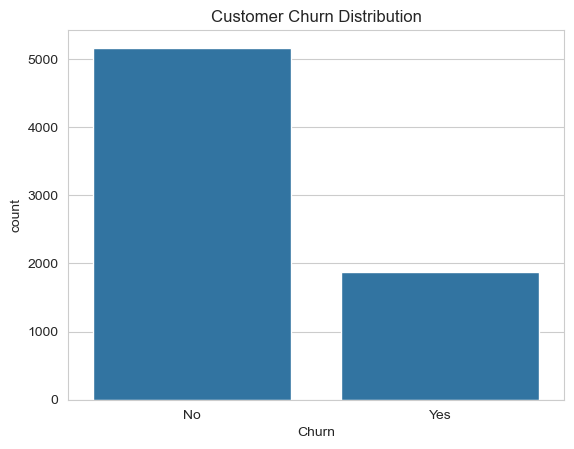

In [20]:
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()


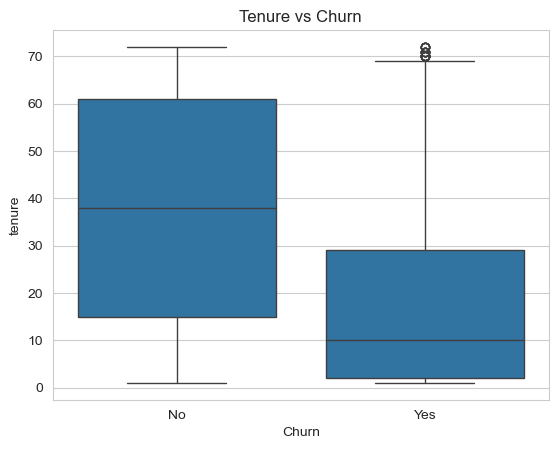

In [21]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

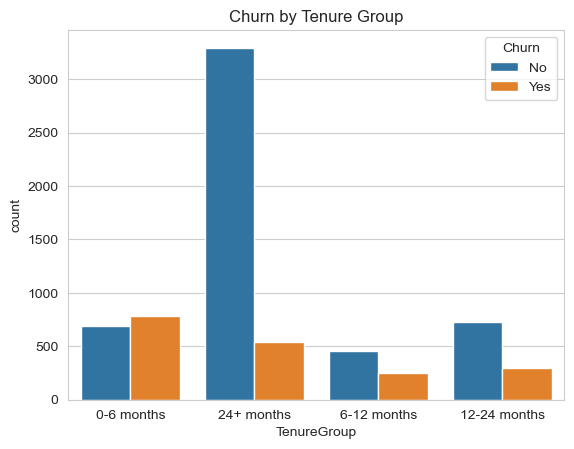

In [22]:
sns.countplot(x='TenureGroup', hue='Churn', data=df)
plt.title("Churn by Tenure Group")
plt.show()

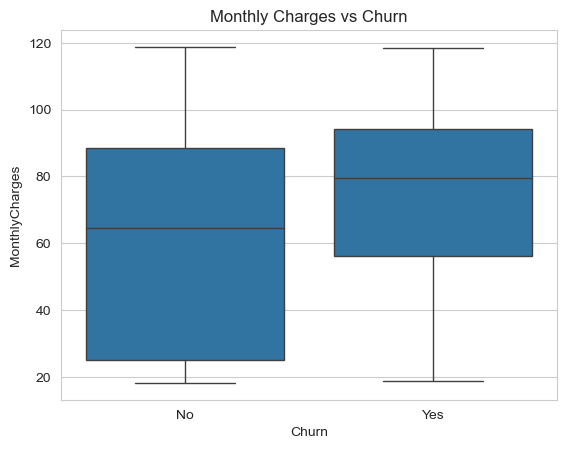

In [23]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


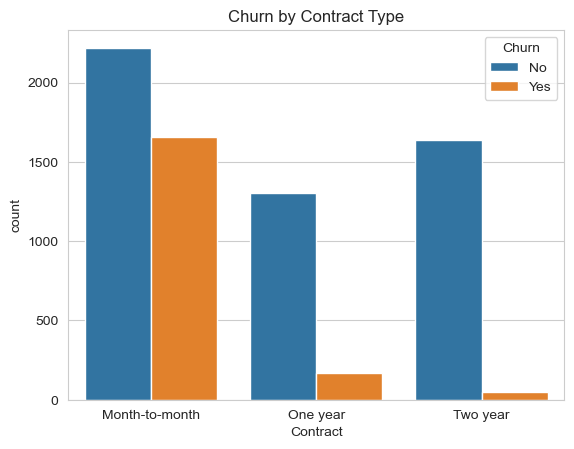

In [24]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()


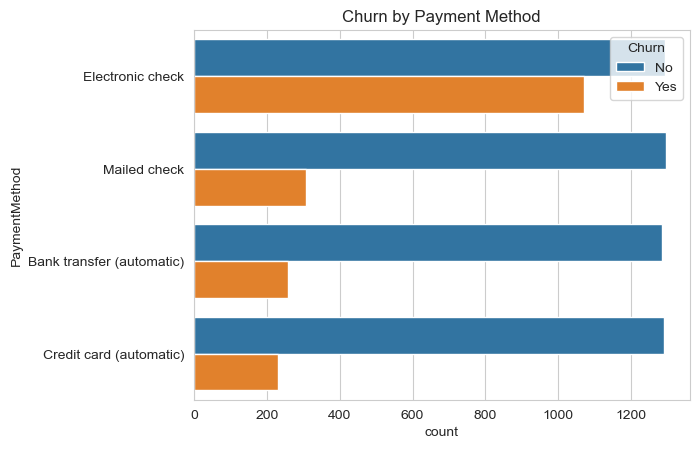

In [25]:
sns.countplot(y='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.show()


In [26]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [27]:
df = df.drop('customerID', axis=1)


In [28]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [29]:
X = pd.get_dummies(X, drop_first=True)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
X_train.shape, X_test.shape


((5625, 36), (1407, 36))

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [34]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [35]:
y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)[:, 1]


In [36]:
accuracy_score(y_test, y_pred)


0.7938877043354655

In [37]:
confusion_matrix(y_test, y_pred)


array([[918, 115],
       [175, 199]])

In [38]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



In [39]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc


0.8355174948620652

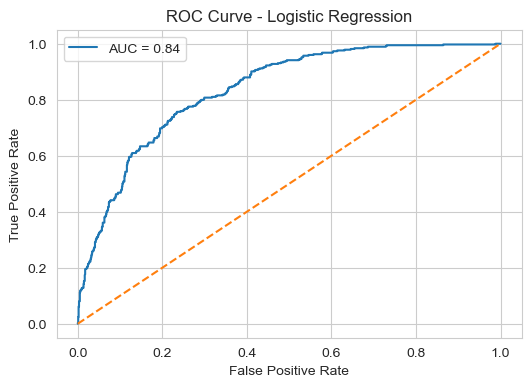

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [41]:
from sklearn.ensemble import RandomForestClassifier


In [42]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]


In [44]:
accuracy_score(y_test, y_pred_rf)
confusion_matrix(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1033
           1       0.54      0.75      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407



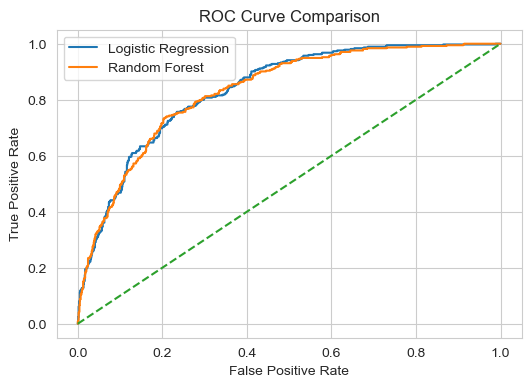

In [45]:
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)
roc_auc_rf
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [46]:
!pip install shap


In [47]:
import shap


In [48]:
# Convert scaled arrays back to DataFrame for SHAP
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)


In [49]:
import shap

explainer = shap.Explainer(rf_model, X_train_df)
shap_values = explainer(X_train_df)


100%|===================| 11232/11250 [07:22<00:00]        

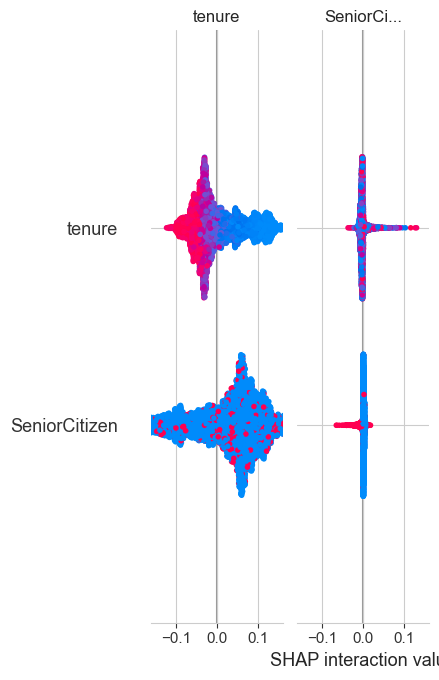

In [50]:
shap.summary_plot(shap_values, X_train_df)


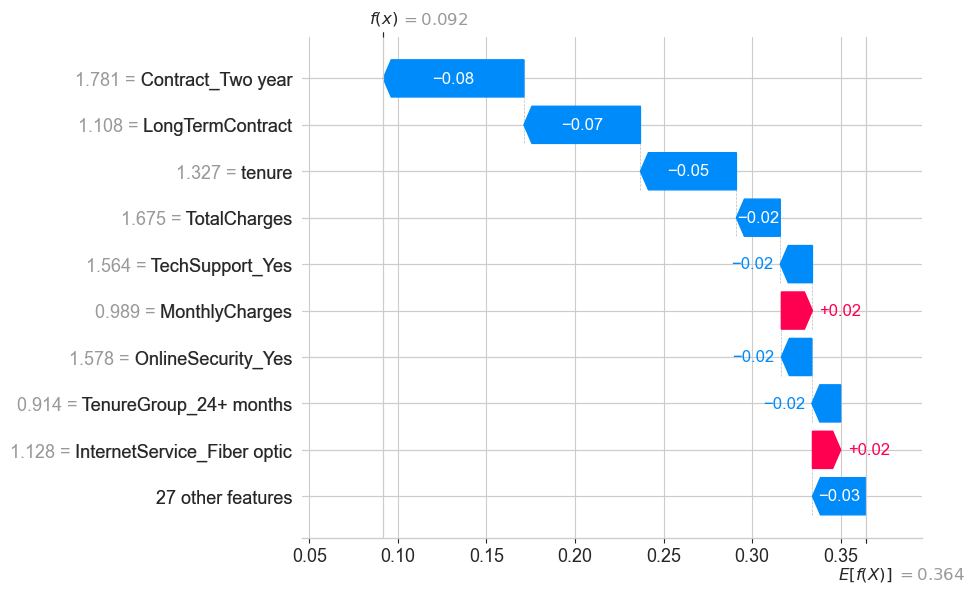

In [51]:
# Waterfall plot for first customer, churn class
shap.plots.waterfall(shap_values[0, :, 1])


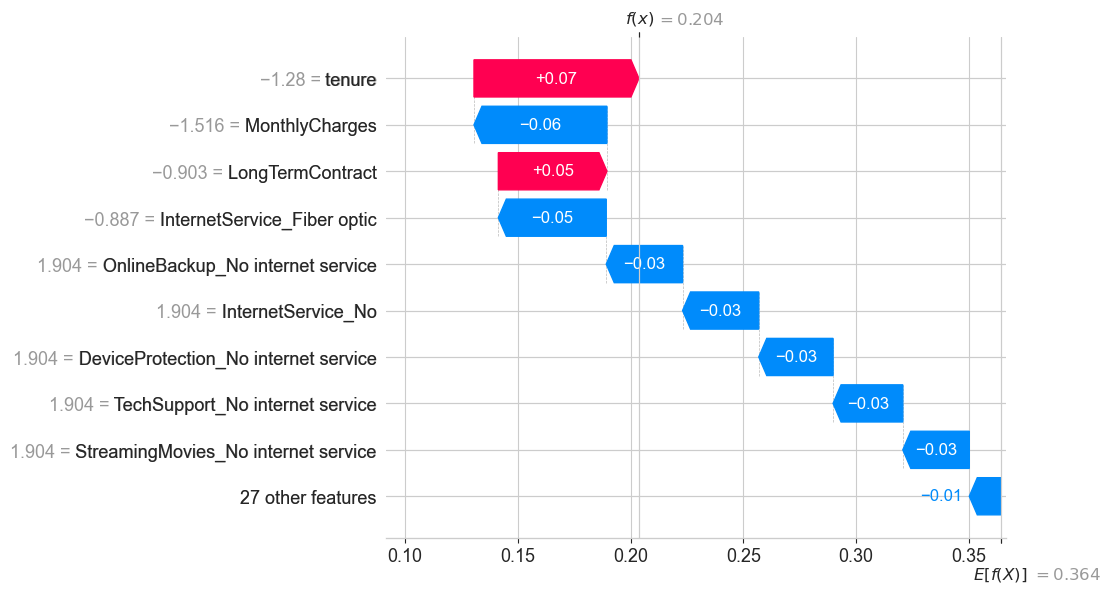

In [52]:
shap.plots.waterfall(shap_values[10, :, 1])


In [53]:
shap_values.shape


(5625, 36, 2)

In [54]:
shap_values[0, :, 1]


.values =
array([-1.95109828e-03, -5.41886836e-02,  1.75318763e-02, -2.47592127e-02,
       -6.57714384e-02, -4.68199763e-03, -1.24812063e-03, -4.58794313e-03,
       -4.66242217e-04, -2.96942533e-04,  5.58785527e-03,  1.59377562e-02,
        2.87186820e-03,  1.98713502e-03, -1.72064480e-02,  2.62372217e-03,
       -7.38505300e-03,  1.92601844e-03,  1.43726935e-03,  1.87204458e-03,
       -1.81563948e-02,  1.74355613e-03, -4.66473900e-03,  2.10184823e-03,
       -7.22674592e-03, -1.72774753e-04, -7.94380368e-02, -5.65865623e-03,
       -1.34124782e-02, -1.14203117e-02,  2.78466688e-03,  8.52567281e-04,
       -1.62883105e-02, -6.00001324e-05,  7.35033286e-04,  6.52150671e-03])

.base_values =
np.float64(0.3642884763954678)

.data =
array([-0.44032709,  1.32736548,  0.98896275,  1.67450477,  1.1078949 ,
        0.99065797,  1.03561683,  1.53302536,  0.32718939, -0.32718939,
        1.17050023,  1.12752731, -0.52513044, -0.52513044,  1.57791834,
       -0.52513044,  1.37833008, -0.525130

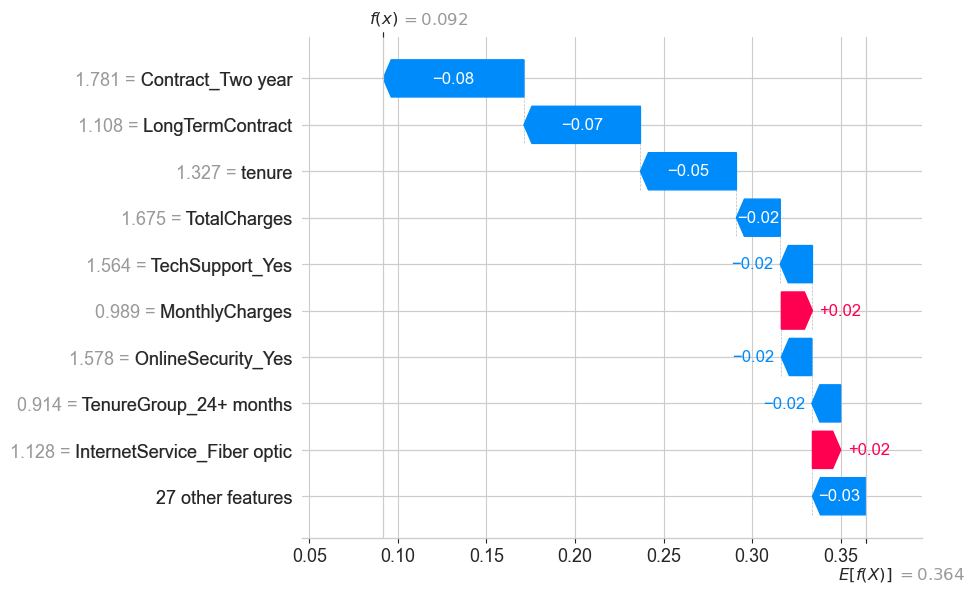

In [55]:
shap.plots.waterfall(shap_values[0, :, 1])


In [56]:
df.to_csv("cleaned_telco_customer_churn.csv", index=False)


In [57]:
df = pd.read_csv("cleaned_telco_customer_churn.csv")


In [58]:
df.to_csv("feature_engineered_telco_churn.csv", index=False)


In [59]:
predictions_df = pd.DataFrame({
    "Actual_Churn": y_test.values,
    "Predicted_Churn": y_pred_rf,
    "Churn_Probability": y_pred_rf_prob
})

predictions_df.to_csv("churn_predictions.csv", index=False)


In [60]:
high_risk_customers = predictions_df[predictions_df["Churn_Probability"] > 0.7]

high_risk_customers.to_csv("high_risk_customers.csv", index=False)


In [61]:
import os
os.listdir()


['.ipynb_checkpoints',
 'churn_predictions.csv',
 'churn_retention_faang.ipynb',
 'cleaned_telco_customer_churn.csv',
 'desktop.ini',
 'feature_engineered_telco_churn.csv',
 'high_risk_customers.csv',
 'task 2.pbix',
 'Telco-Customer-Churn.csv']